In [21]:
import LAB_FEEC_UNICAMP as tcc
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import pickle as pk
%matplotlib notebook

In [ ]:
pasta = 'Simulados'

arquivos = glob.glob("data/"+pasta+"/*.pickle")

MVDR_Incs = []
MVDR_Refls = []
Conds_Rxx_Global = []
Rates_Median = []
fs=0
for a in arquivos:
    with open(a, 'rb') as f:
        T = pk.load(f)
        mI = T['MVDR_Inc']
        mR = T['MVDR_Refl']
        MVDR_Incs.append(mI)
        MVDR_Refls.append(mR)

        Rates_Median.append([1 - (np.absolute(mR[i])/np.absolute(mI[i]))**2 for i in range(0,len(mI))])

        #conds = T['Conds_Rxx_Inc']
        #conds = conds/np.mean(conds)
        #Conds_Rxx_Global.append(conds)

        fs = T['fs']
        f.close()

Rates_Median = np.median(Rates_Median,axis=0)

Rates = pd.DataFrame(Rates_Median).rolling(300,min_periods=1,center=True).median()._values

plt.figure()
plt.title('Coef. Absorção')
plt.xlim(250,8000)
plt.ylim(0,1)
plt.semilogx(np.linspace(0,fs/2-1,len(Rates_Median)),Rates,'g',linewidth=0.25)

plt.show()

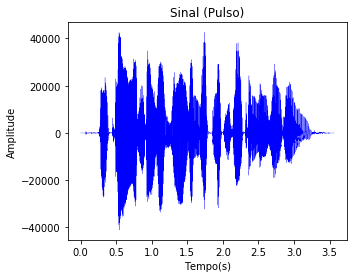

In [3]:
c=343.3
fs = 44100
arr = tcc.Array(c=c)
arr_n = tcc.Array(c=c)
#wavTest_pulse
#arctic_a0010
pos_mics = [0.052,0.51,1.03,1.53]
pos_mic_amos = 2

arr_orig = tcc.Array(c=c)
arr_orig.simulatefromWav(    'Audios/arctic_a0010.wav',pos_mics,pos_mic_amos,coefInc=1,coefRef=0)
Orig = arr_orig.Microphones[0].signal.Spectrum
Orig_time = arr_orig.Microphones[0].signal.time()
arr.simulatefromWav('Audios/arctic_a0010.wav',pos_mics,pos_mic_amos,coefInc=1,coefRef=0.2)

plt.figure(figsize=(5,4))
plt.plot(np.linspace(0,len(Orig_time)/arr.fs,len(Orig_time)),Orig_time*2,'b',linewidth=0.25)
plt.title('Sinal (Pulso)')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.show()

<IPython.core.display.Javascript object>


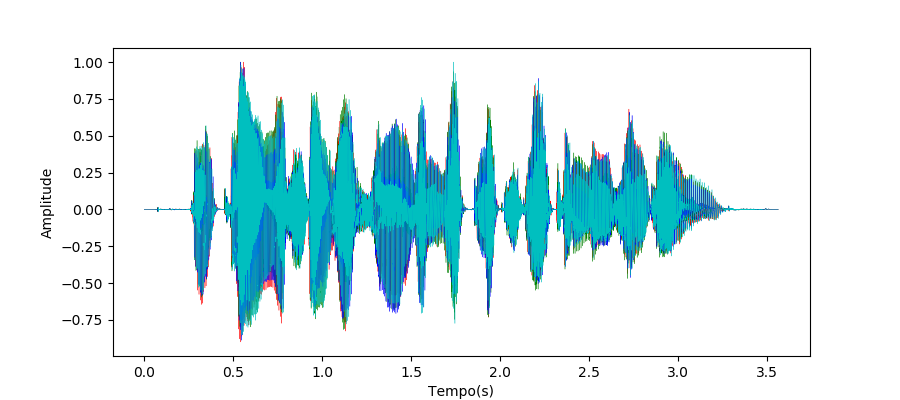

In [34]:
plt.figure(figsize=(9,4))
sig1 = arr.Microphones[0].signal.time()
plt.plot(np.linspace(0,len(sig1)/arr.fs,len(sig1)),sig1/max(sig1),'r',linewidth=0.25)
sig2 = arr.Microphones[1].signal.time()
plt.plot(np.linspace(0,len(sig2)/arr.fs,len(sig2)),sig2/max(sig2),'g',linewidth=0.25)
sig3 = arr.Microphones[2].signal.time()
plt.plot(np.linspace(0,len(sig3)/arr.fs,len(sig3)),sig3/max(sig3),'b',linewidth=0.25)
sig4 = arr.Microphones[3].signal.time()
plt.plot(np.linspace(0,len(sig4)/arr.fs,len(sig4)),sig4/max(sig4),'c',linewidth=0.25)
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
plt.figure(figsize=(5,4))
DAS = tcc.toTime(tcc.applyDAS(arr, False))
plt.plot(np.linspace(0,1,len(DAS)),DAS,'b',linewidth=0.25)
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.show()

<IPython.core.display.Javascript object>


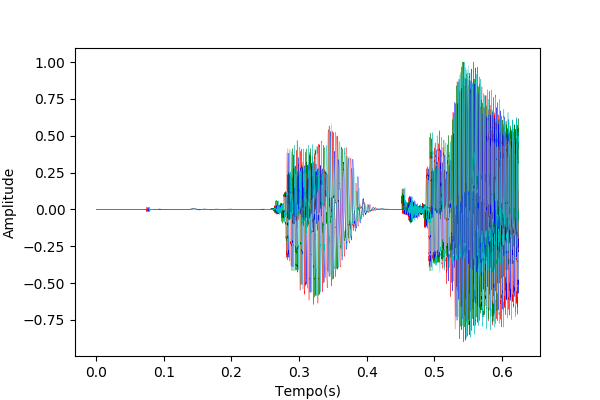

In [48]:
plt.figure(figsize=(6,4))
sig1 = arr.Microphones[0].signal.time()[0:10000]
plt.plot(np.linspace(0,len(sig1)/arr.fs,len(sig1)),sig1/max(sig1),'r',linewidth=0.25)
sig2 = arr.Microphones[1].signal.time()[0:10000]
plt.plot(np.linspace(0,len(sig2)/arr.fs,len(sig2)),sig2/max(sig2),'g',linewidth=0.25)
sig3 = arr.Microphones[2].signal.time()[0:10000]
plt.plot(np.linspace(0,len(sig3)/arr.fs,len(sig3)),sig3/max(sig3),'b',linewidth=0.25)
sig4 = arr.Microphones[3].signal.time()[0:10000]
plt.plot(np.linspace(0,len(sig4)/arr.fs,len(sig4)),sig4/max(sig4),'c',linewidth=0.25)
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.show()

<IPython.core.display.Javascript object>


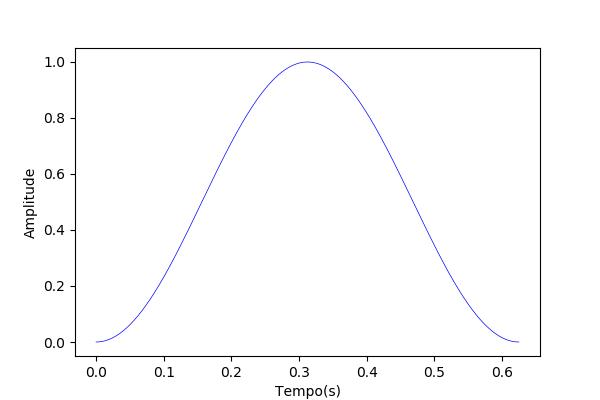

In [46]:
plt.figure(figsize=(6,4))
hann = np.hanning(len(sig1))
plt.plot(np.linspace(0,len(hann)/arr.fs,len(hann)),hann,'b',linewidth=0.5)
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.show()

<IPython.core.display.Javascript object>


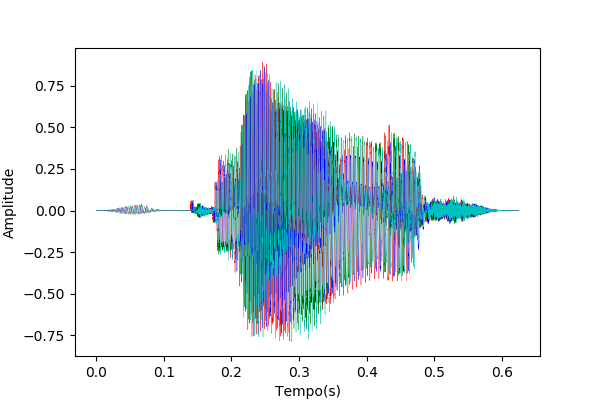

In [47]:
plt.figure(figsize=(6,4))
plt.plot(np.linspace(0,len(sig1)/arr.fs,len(sig1)),sig1*hann/max(sig1),'r',linewidth=0.25)
plt.plot(np.linspace(0,len(sig2)/arr.fs,len(sig2)),sig2*hann/max(sig2),'g',linewidth=0.25)
plt.plot(np.linspace(0,len(sig3)/arr.fs,len(sig3)),sig3*hann/max(sig3),'b',linewidth=0.25)
plt.plot(np.linspace(0,len(sig4)/arr.fs,len(sig4)),sig4*hann/max(sig4),'c',linewidth=0.25)
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
tcc.Test('Pulse_3_DL0', Orig, arr, 3, 0)

In [ ]:
tcc.Show_Data('Pulse_3_DL0')